# Quick scripting for XPS-tool

## Nanolab data (Al K-alpha radiation 1486.61 eV)

In [1]:
import os
import matplotlib.pyplot as plt

In [28]:
# Constants
exitation_energy = 1486.61

In [2]:
# Full path to data files
data_path = "/Users/Shipilin/Documents/07_DataAnalysis/2018-RhFe_alloys/2018-November_Rh80Fe20/2018-11_Rh80Fe20_XPS/XY_RhFe/"
# Folders to add to the full path above 
data_folders = [
    "Rh80Fe20(111)",
    "Rh80Fe20(111)_7_11",
    "Rh80Fe20(111)_8_11",
    "Rh80Fe20(111)_9_11"
]

# List of all directories (combine the full path with specified folders)
all_dirs = ["".join([data_path, data_folder]) for data_folder in data_folders]

In [21]:
# Iterating through directories displaying existing files
files = []
for i, dirname in enumerate(sorted(all_dirs)):
    if i > 0: # Just to make it prettier (no empty line before the first output)
        print() # Otherwise, add an empty line to separate outputs
    print(f"all_dirs[{i}]: {dirname}")
    # Lambda function below allows for sorting the filneames according to _1, _2, ... ending
    for i, filename in enumerate(sorted(os.listdir(all_dirs[0]), key=lambda x:int(x.split("_")[1].split(".")[0]))):
        files.append(filename)
        print(f"---> files[{i}]: {filename}")

all_dirs[0]: /Users/Shipilin/Documents/07_DataAnalysis/2018-RhFe_alloys/2018-November_Rh80Fe20/2018-11_Rh80Fe20_XPS/XY_RhFe/Rh80Fe20(111)
---> files[0]: Rh80Fe20(111)_1.xy
---> files[1]: Rh80Fe20(111)_2.xy
---> files[2]: Rh80Fe20(111)_3.xy
---> files[3]: Rh80Fe20(111)_4.xy
---> files[4]: Rh80Fe20(111)_5.xy
---> files[5]: Rh80Fe20(111)_6.xy
---> files[6]: Rh80Fe20(111)_7.xy
---> files[7]: Rh80Fe20(111)_8.xy
---> files[8]: Rh80Fe20(111)_9.xy
---> files[9]: Rh80Fe20(111)_10.xy
---> files[10]: Rh80Fe20(111)_11.xy
---> files[11]: Rh80Fe20(111)_12.xy
---> files[12]: Rh80Fe20(111)_13.xy
---> files[13]: Rh80Fe20(111)_14.xy
---> files[14]: Rh80Fe20(111)_15.xy
---> files[15]: Rh80Fe20(111)_16.xy
---> files[16]: Rh80Fe20(111)_17.xy
---> files[17]: Rh80Fe20(111)_18.xy
---> files[18]: Rh80Fe20(111)_19.xy
---> files[19]: Rh80Fe20(111)_20.xy
---> files[20]: Rh80Fe20(111)_21.xy
---> files[21]: Rh80Fe20(111)_22.xy
---> files[22]: Rh80Fe20(111)_23.xy
---> files[23]: Rh80Fe20(111)_24.xy
---> files[24]: R

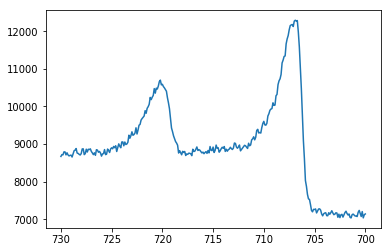

In [38]:
# Plot certain file(s)
with open("/".join([all_dirs[0], files[5]])) as f:
    lines = f.read().splitlines()
    
energy, counts = [], []
for line in lines:
    if (line.strip().startswith('#')) or not line:
        continue # Scip comment and empty lines
    else:
        xy = line.split()
        x = float(xy[0].strip())
        y = float(xy[1].strip())
        if y > 0:
            energy.append(x)
            counts.append(y)

binding_energy = [exitation_energy - value for value in energy]
plt.plot(binding_energy, counts)
plt.gca().invert_xaxis()

In [36]:
dir(plt.xaxis)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'